In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

# VERİ SETİ

In [34]:
data = pd.read_csv("smoke_detection_iot.csv",index_col=[0])

In [35]:
data.head(5)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


<Axes: xlabel='Fire Alarm', ylabel='count'>

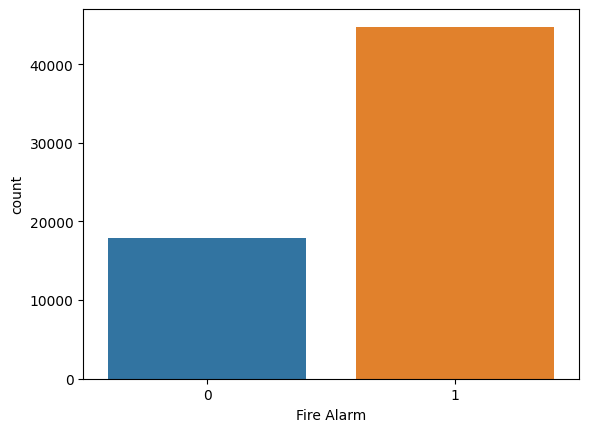

In [36]:
sns.countplot(x ='Fire Alarm', data = data)

In [37]:
corr = data.corr()

/tmp/ipykernel_1311576/3144046917.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, 'UTC'),
  Text(0, 1.5, 'Temperature[C]'),
  Text(0, 2.5, 'Humidity[%]'),
  Text(0, 3.5, 'TVOC[ppb]'),
  Text(0, 4.5, 'eCO2[ppm]'),
  Text(0, 5.5, 'Raw H2'),
  Text(0, 6.5, 'Raw Ethanol'),
  Text(0, 7.5, 'Pressure[hPa]'),
  Text(0, 8.5, 'PM1.0'),
  Text(0, 9.5, 'PM2.5'),
  Text(0, 10.5, 'NC0.5'),
  Text(0, 11.5, 'NC1.0'),
  Text(0, 12.5, 'NC2.5'),
  Text(0, 13.5, 'CNT'),
  Text(0, 14.5, 'Fire Alarm')])

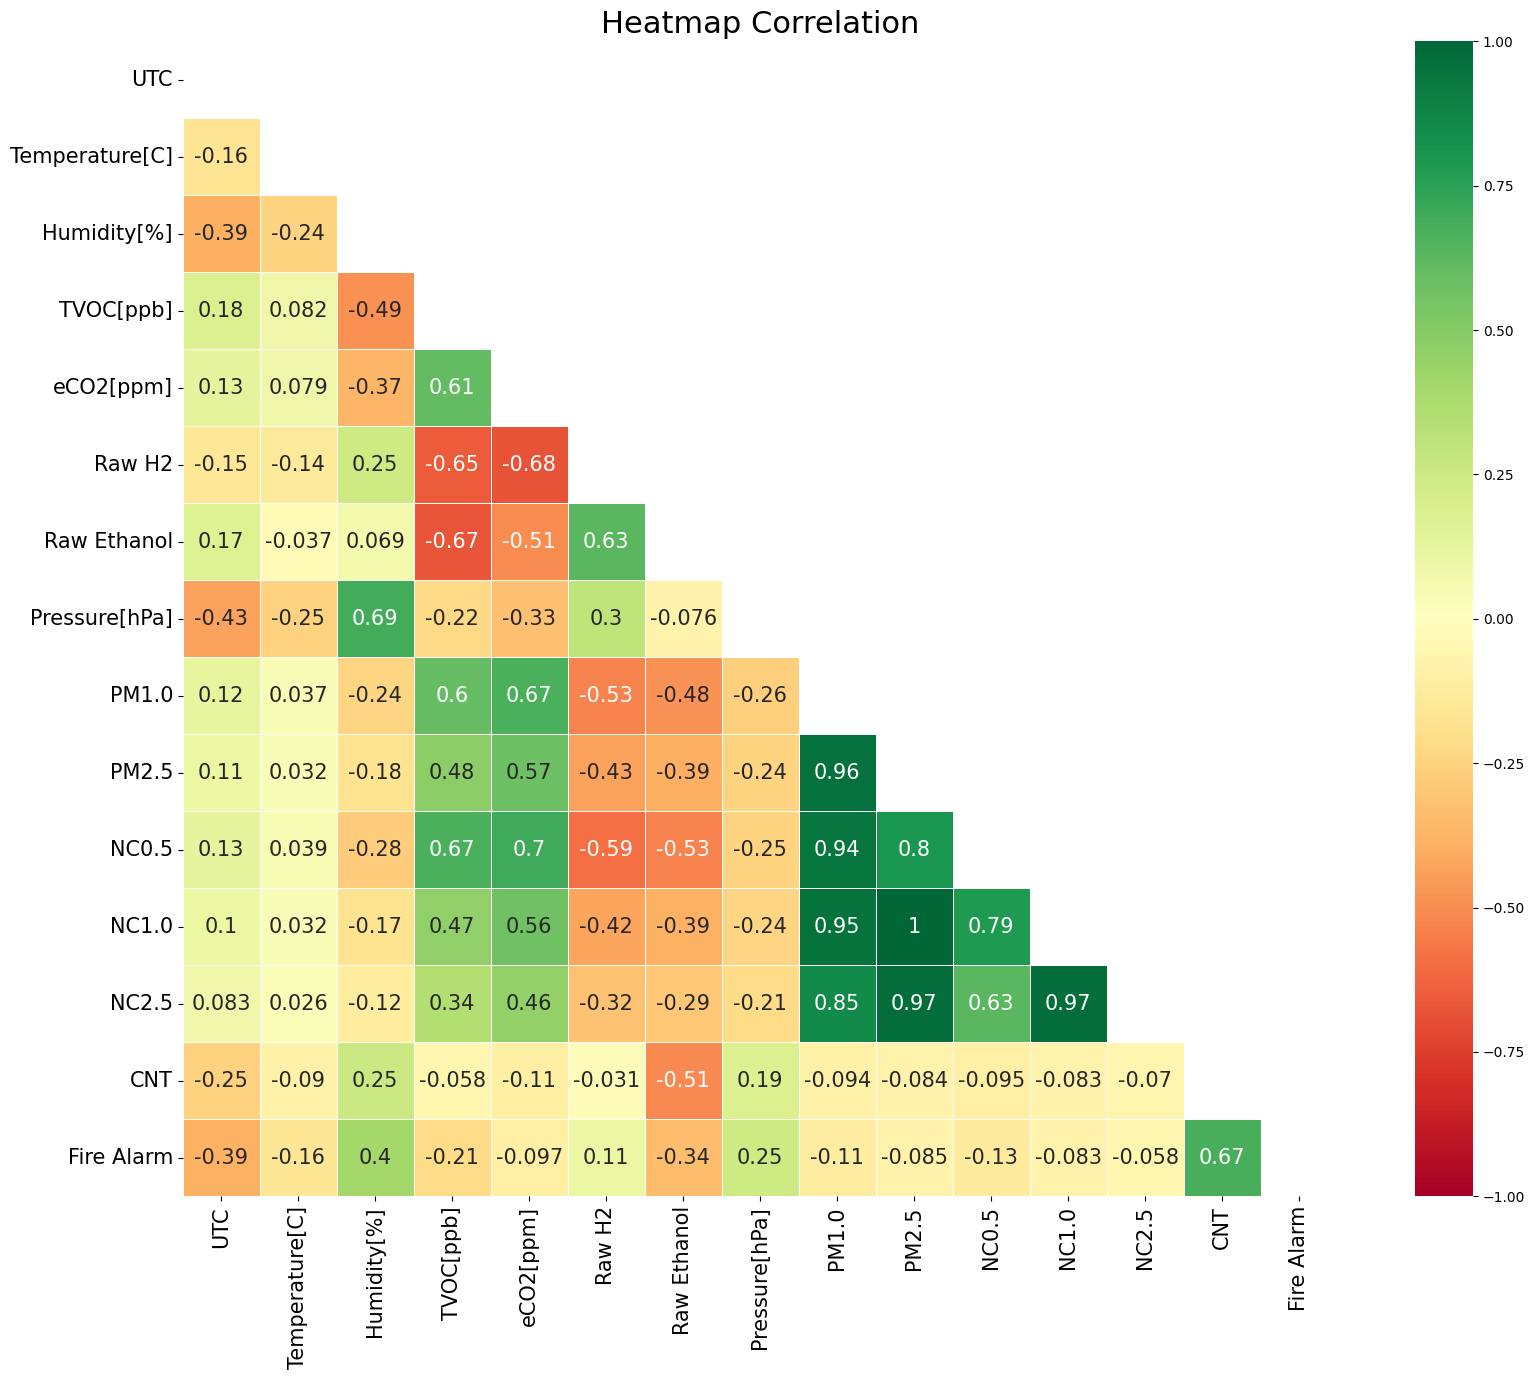

In [38]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 15})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

# STANDARDIZASYON

In [39]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [40]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [42]:
sm = SMOTE()
X_smote, Y_smote = sm.fit_resample(X_train, Y_train)

<Axes: ylabel='count'>

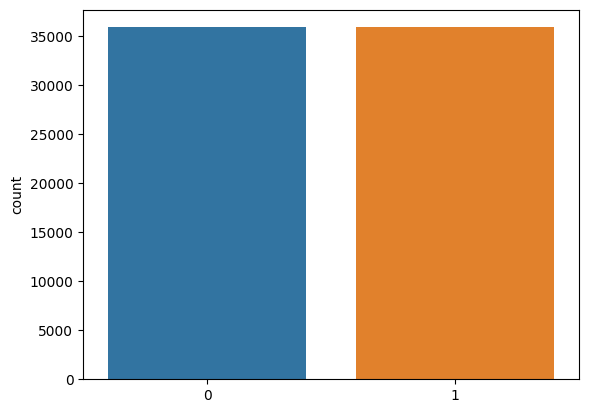

In [43]:
sns.countplot(x = Y_smote)

In [44]:
scaler = StandardScaler()
scaler.fit(X_smote[:])
X_smote[:] = scaler.transform(X_smote[:])
X_test[:] = scaler.transform(X_test[:])

# One Model Binary Classification

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc


In [46]:
result = {}
start_time = time.time()
lr = LogisticRegression()
lr.fit(X_smote, Y_smote)

Y_pred = lr.predict(X_test)
Y_prod_proba = lr.predict_proba(X_test)
training_time = time.time() - start_time

/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
one_model_binary_class_results = {}

one_model_binary_class_results["Logistic Regression"] = [accuracy_score(Y_test, Y_pred),
                                  precision_score(Y_test, Y_pred, average='weighted'),
                                  recall_score(Y_test, Y_pred, average='weighted'),
                                  f1_score(Y_test, Y_pred, average='weighted'),
                                  training_time]


In [48]:
df_results = pd.DataFrame.from_dict(one_model_binary_class_results, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "Training Time"] )
df_results.sort_values(by="F1-Score", ascending= False, na_position= "first")

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.984273,0.98489,0.984273,0.984375,0.256322


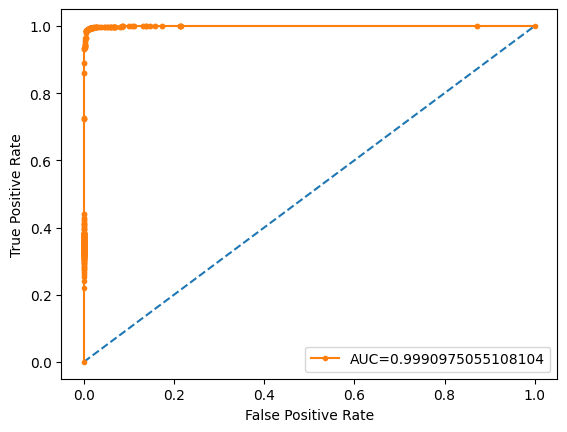

In [49]:
pos_probs = Y_prod_proba[:, 1]
plt.plot([0, 1], [0, 1], linestyle='--')
auc = roc_auc_score(Y_test, pos_probs)
fpr, tpr, _ = roc_curve(Y_test, pos_probs)
plt.plot(fpr, tpr, marker='.', label="AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Multi Model Binary Classification

In [50]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier()
]

models_description = [
    "Logistic Regression",
    "Decision Tree Classifier",
    "Random Forest",
    "MLP"
]

In [51]:
results= {}
y_probe_list = []
for index in range(len(models)):
    start_time = time.time()
    model = models[index]
    model.fit(X_smote, Y_smote)

    Y_pred = model.predict(X_test)
    Y_prod_proba = model.predict_proba(X_test)
    y_probe_list.append(Y_prod_proba)
    training_time = time.time() - start_time

    results[models_description[index]] = [accuracy_score(Y_test, Y_pred),
                                  precision_score(Y_test, Y_pred, average='weighted'),
                                  recall_score(Y_test, Y_pred, average='weighted'),
                                  f1_score(Y_test, Y_pred, average='weighted'),
                                  training_time]

/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "Training Time"] )
df_results.sort_values(by="F1-Score", ascending= False, na_position= "first")

,Accuracy,Precision,Recall,F1-Score,Training Time
Decision Tree Classifier,0.999920,0.99992,0.999920,0.999920,0.355485
Random Forest,0.999920,0.99992,0.999920,0.999920,5.287991
MLP,0.999920,0.99992,0.999920,0.999920,10.548626
Logistic Regression,0.984273,0.98489,0.984273,0.984375,0.256376


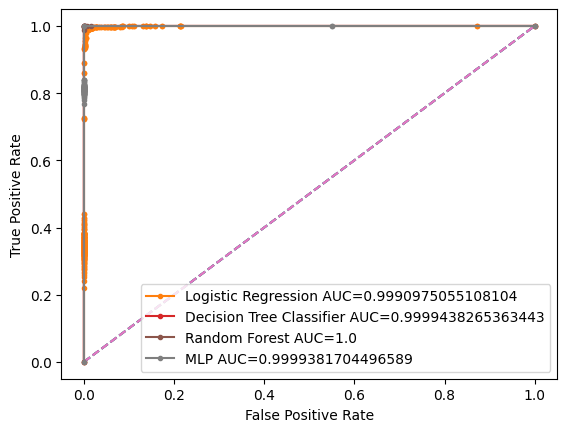

In [53]:
for index in range(4):
    pos_probs = y_probe_list[index][:, 1]
    plt.plot([0, 1], [0, 1], linestyle='--')
    auc = roc_auc_score(Y_test, pos_probs)
    fpr, tpr, _ = roc_curve(Y_test, pos_probs)
    plt.plot(fpr, tpr, marker='.', label=models_description[index] +" AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# One Model Multi Label Classification

VERİ SETİNİN YÜKLENMESİ

In [54]:
data_iris = pd.read_csv("iris.data", sep= ",", header=None, names=["sepal_length","sepal_weight","petal_length","petal_width","class_name"])
data_iris

,sepal_length,sepal_weight,petal_length,petal_width,class_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


VERİ ÖNİŞLEME, ENCODING

In [55]:
le     = LabelEncoder()
data_iris["class"] = le.fit_transform(data_iris["class_name"])

VERİ SETİNİN AYRILMASI, TRAIN and TEST

In [56]:
X = data_iris.iloc[:, :-2].values
y = data_iris.iloc[:, -1].values

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [58]:
bolum_3_result = {}
start_time = time.time()
lr = LogisticRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
iris_proba = lr.predict_proba(X_test)

bolum_3_result["Logistic Regression"] = [accuracy_score(Y_test, Y_pred),
                                  precision_score(Y_test, Y_pred, average='weighted'),
                                  recall_score(Y_test, Y_pred, average='weighted'),
                                  f1_score(Y_test, Y_pred, average='weighted'),
                                  training_time]

/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
df_results = pd.DataFrame.from_dict(bolum_3_result, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "Training Time"] )
df_results.sort_values(by="F1-Score", ascending= False, na_position= "first")

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.966667,0.968519,0.966667,0.964762,10.548626


In [60]:
data_iris.class_name.unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [63]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

ROC AUC score: 0.9455128205128206


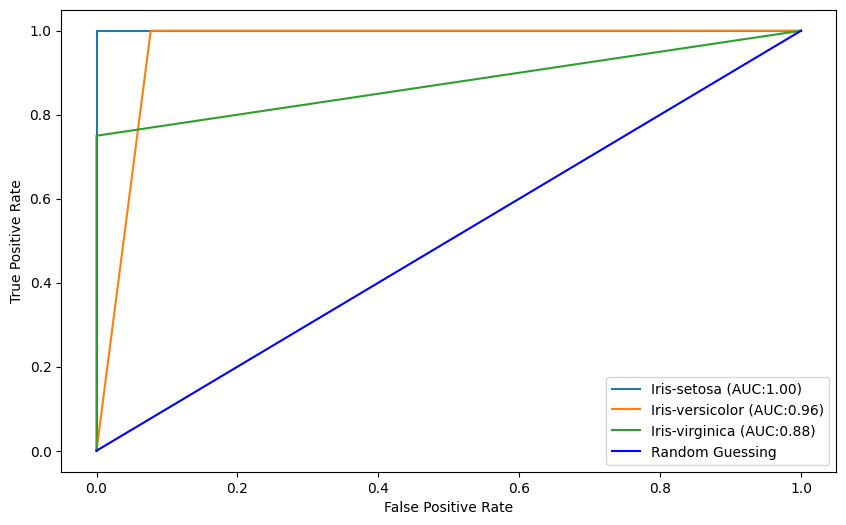

In [64]:
target= lr.classes_.tolist()
data_str = data_iris.class_name.unique()
fig, c_ax = plt.subplots(1,1, figsize = (10, 6))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):

    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)


    for (idx, c_label) in enumerate(target):

        fpr, tpr, thresholds = roc_curve(y_test[:,idx], y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (data_str[c_label], auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(Y_test, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

# ROC Curve - One vs Rest (OvR), One vs One (OvO)

In [65]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [66]:
X = data_iris.iloc[:, :-2].values
y = data_iris.iloc[:, -2].values

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [68]:
model_multiclass = RandomForestClassifier(n_estimators = 50, criterion = 'gini')

In [69]:
model_multiclass.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [70]:
y_pred = model_multiclass.predict(X_test)

In [71]:
y_proba = model_multiclass.predict_proba(X_test)


In [72]:
classes = model_multiclass.classes_
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [73]:
def calculate_tpr_fpr(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [74]:
def get_all_roc_coordinates(y_real, y_proba):

    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [75]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):

    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax, label = '%s (AUC:%0.2f)'  % (c, roc_auc_score(df_aux['class'], df_aux['prob'])))
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

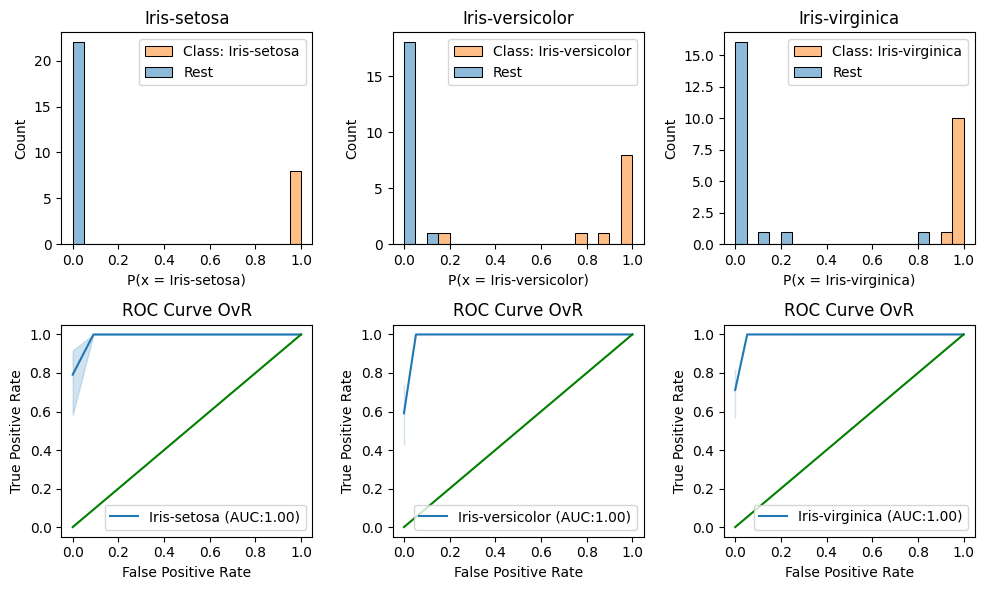

In [76]:

plt.figure(figsize = (10, 6))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    c = classes[i]
    
    df_aux = pd.DataFrame(X_test, columns = ['A','B','C','D'])
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [77]:
roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovr', average = 'macro')

1.0

In [78]:
classes_combinations = []
class_list = list(classes)
for i in range(len(class_list)):
    for j in range(i+1, len(class_list)):
        classes_combinations.append([class_list[i], class_list[j]])
        classes_combinations.append([class_list[j], class_list[i]])
classes_combinations

[['Iris-setosa', 'Iris-versicolor'],
 ['Iris-versicolor', 'Iris-setosa'],
 ['Iris-setosa', 'Iris-virginica'],
 ['Iris-virginica', 'Iris-setosa'],
 ['Iris-versicolor', 'Iris-virginica'],
 ['Iris-virginica', 'Iris-versicolor']]

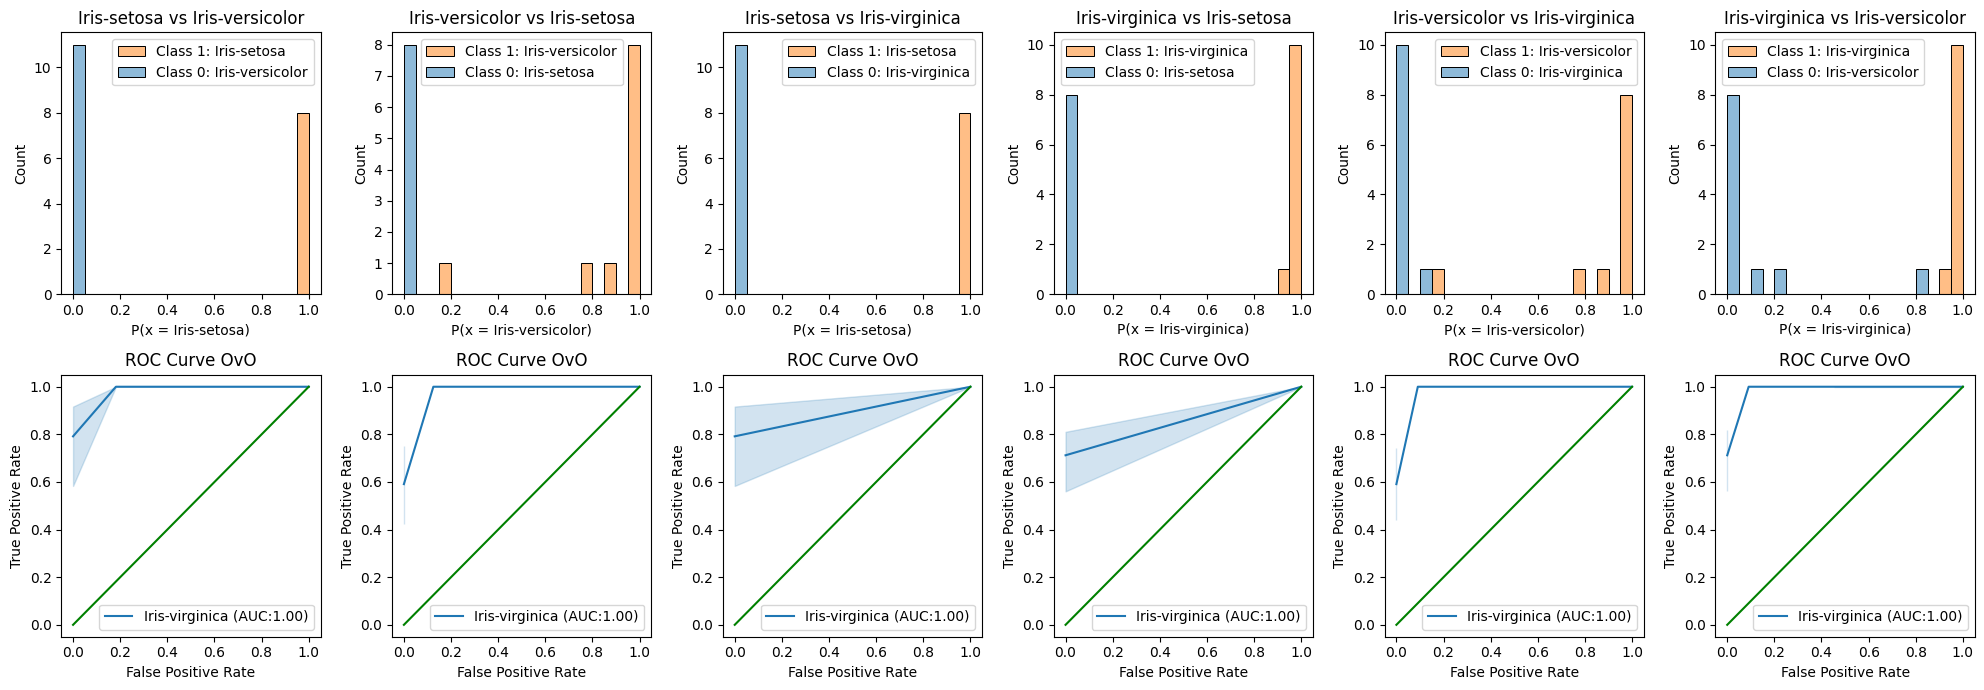

In [79]:
plt.figure(figsize = (20, 7))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovo = {}

for i in range(len(classes_combinations)):
    comb = classes_combinations[i]
    c1 = comb[0]
    c2 = comb[1]
    c1_index = class_list.index(c1)
    title = c1 + " vs " +c2
    
    df_aux = pd.DataFrame(X_test, columns = ['A','B','C','D'])
    df_aux['class'] = y_test
    df_aux['prob'] = y_proba[:, c1_index]

    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
    df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
    df_aux = df_aux.reset_index(drop = True)
    
    ax = plt.subplot(2, 6, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(title)
    ax.legend([f"Class 1: {c1}", f"Class 0: {c2}"])
    ax.set_xlabel(f"P(x = {c1})")
    
    #ROC Coordinates ve ROC Curves hesaplamasını yap
    ax_bottom = plt.subplot(2, 6, i+7)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvO")
    
    # ROC AUC OvO hesapla
    roc_auc_ovo[title] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [80]:
avg_roc_auc = 0
i = 0
for k in roc_auc_ovo:
    avg_roc_auc += roc_auc_ovo[k]
    i += 1
    print(f"{k} ROC AUC OvO: {roc_auc_ovo[k]:.4f}")
print(f"average ROC AUC OvO: {avg_roc_auc/i:.4f}")

Iris-setosa vs Iris-versicolor ROC AUC OvO: 1.0000
Iris-versicolor vs Iris-setosa ROC AUC OvO: 1.0000
Iris-setosa vs Iris-virginica ROC AUC OvO: 1.0000
Iris-virginica vs Iris-setosa ROC AUC OvO: 1.0000
Iris-versicolor vs Iris-virginica ROC AUC OvO: 1.0000
Iris-virginica vs Iris-versicolor ROC AUC OvO: 1.0000
average ROC AUC OvO: 1.0000


In [81]:
roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovo', average = 'macro')

1.0